<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
word_index = {k:(v+3) for k,v in word_index.items()}

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

# Perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [4]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

import numpy as np 

batch_size = 32

class_names = ['']

all_articles = np.concatenate((X_train, X_test), axis=0)

# Review lengths across test and training whole datasets
print("Maximum article length: {}".format(len(max((all_articles), key=len))))
print("Minimum article length: {}".format(len(min((all_articles), key=len))))
result = [len(x) for x in all_articles]
print("Mean article length: {}".format(np.mean(result)))

print("")
print("Machine Readable Article")
print("  Article Text: " + str(X_train[10]))
print("  Article Class: " + str(y_train[10]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Article")
print("  Article Text: " + decode_review(X_train[10]))
print("  Article Class: " + str(y_train[10]))

Maximum article length: 2376
Minimum article length: 2
Mean article length: 145.96419665122906

Machine Readable Article
  Article Text: [1, 4, 1456, 5, 141, 357, 1103, 332, 21, 4, 8239, 5, 678, 40, 10706, 218, 21, 4, 4537, 3309, 357, 76, 7, 4, 585, 121, 66, 199, 8, 144, 34, 210, 13704, 1221, 13, 1091, 1875, 50, 34, 958, 1646, 622, 77, 8, 787, 24, 858, 1580, 9545, 62, 129, 1104, 554, 77, 8, 77, 133, 569, 9, 1856, 6, 500, 198, 2424, 13, 91, 950, 225, 121, 290, 4, 195, 5, 4, 1056, 357, 869, 5787, 2943, 8, 331, 36, 64, 45, 836, 830, 185, 25, 2424, 41, 4085, 17, 12]
  Article Class: 9

Human Readable Article
  Article Text: <START> the failure of international coffee organization talks on the reintroduction of quotas has paralysed business on the hamburg green coffee market in the past week trade sources said there was only sporadic activity for spot material which was mainly requirement buying they said adding that pre registered coffees were no longer available they said they expected br

In [0]:
# Pad the articles to make them equal length
from tensorflow.keras.preprocessing import sequence
import pandas as pd
import tensorflow as tf

maxlen=225

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [0]:
# One hotting our y values

y_train = tf.one_hot(y_train, depth=46, axis=-1)
y_test = tf.one_hot(y_test, depth=46, axis=-1)

In [0]:
# create our modle and compile

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM

lstm = Sequential()
lstm.add(Embedding(max_features +1, 128))
lstm.add(LSTM(32))
lstm.add(Dropout(0.25))
lstm.add(Dense(46, activation='softmax'))

lstm.compile(loss='categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

In [8]:
# A useful tool is to look at the summary

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3966080   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                20608     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 46)                1518      
Total params: 3,988,206
Trainable params: 3,988,206
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 5 Epochs should show some improvement, but it takes a while!

lstm_history = lstm.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        batch_size=batch_size,
                        epochs=5,
                        verbose=1)

Epoch 1/5
281/281 [==============================] - 14s 50ms/step - loss: 2.3492 - accuracy: 0.4211 - val_loss: 1.7868 - val_accuracy: 0.5027
Epoch 2/5
281/281 [==============================] - 14s 49ms/step - loss: 1.7931 - accuracy: 0.5227 - val_loss: 1.6836 - val_accuracy: 0.5450
Epoch 3/5
281/281 [==============================] - 13s 47ms/step - loss: 1.6068 - accuracy: 0.5764 - val_loss: 1.5969 - val_accuracy: 0.5873
Epoch 4/5
281/281 [==============================] - 13s 47ms/step - loss: 1.4390 - accuracy: 0.6136 - val_loss: 1.5976 - val_accuracy: 0.5703
Epoch 5/5
281/281 [==============================] - 13s 47ms/step - loss: 1.2639 - accuracy: 0.6639 - val_loss: 1.4827 - val_accuracy: 0.6385


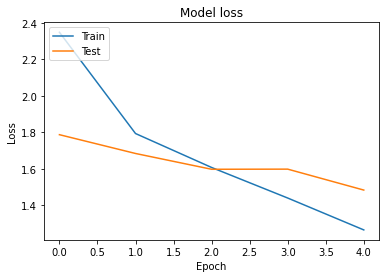

In [10]:
# Let's plot it! 

import matplotlib.pyplot as plt

plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*
#####Pad_sequences is a method from Keras Preprocessing that is used to ensure all sequences in a dataset will be the same length. This is done to keep it consistent for proper calculations. 


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*
##### RNNs have "short-term memory". LSTMs add memorgy gates in order to use earlier weights. 


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*
##### Three cases for LSTMs are Robot control, grammar learning, and time series prediction. These are all cases that do well with LSTMs since there won't be an issue with shirt term memory loss. More data can be input for better predictions. 

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
# I am having some serious issues getting any images to load

'''from skimage.io import imread_collection
from skimage.transform import resize
import numpy as np

images = imread_collection('./frog_images/*.jpg')'''

"from skimage.io import imread_collection\nfrom skimage.transform import resize\nimport numpy as np\n\nimages = imread_collection('./frog_images/*.jpg')"

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [13]:
!pip install google_images_download

     |████████████████████████████████| 911kB 23.9MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=f451d890a3eeaeb62fe278675795ca52082ff5879d9c38285142020423af54de
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [14]:
# Hopefully this works 

from google_images_download import google_images_download


response = google_images_download.googleimagesdownload()
arguments = {"keywords": "frog", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = frog
Evaluating...
Starting Download...


Unfortunately all 5 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0



Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [0]:
import glob
import numpy as np

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50V2(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features)[0]
    print(results)
    if 'frog' in results[0][1] and results[0][2] > 0.25:
        return True
    else:
        return False

In [31]:
# Not one says frog here :/ 

imagelist = glob.glob('/content/drive/My Drive/frog_images2/*.jpg')
for x in imagelist:
    print(img_contains_frog(process_img_path(x)))

[('n02089973', 'English_foxhound', 1.0), ('n15075141', 'toilet_tissue', 0.0), ('n02321529', 'sea_cucumber', 0.0), ('n02395406', 'hog', 0.0), ('n02391049', 'zebra', 0.0)]
False
[('n02089973', 'English_foxhound', 1.0), ('n07613480', 'trifle', 2.155502e-24), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0), ('n02389026', 'sorrel', 0.0)]
False
[('n02356798', 'fox_squirrel', 0.99999774), ('n02089973', 'English_foxhound', 2.2708334e-06), ('n15075141', 'toilet_tissue', 0.0), ('n02321529', 'sea_cucumber', 0.0), ('n02395406', 'hog', 0.0)]
False
[('n02089973', 'English_foxhound', 0.99999964), ('n02356798', 'fox_squirrel', 3.5420362e-07), ('n02085782', 'Japanese_spaniel', 3.6510233e-26), ('n15075141', 'toilet_tissue', 0.0), ('n02321529', 'sea_cucumber', 0.0)]
False
[('n07613480', 'trifle', 1.0), ('n02089973', 'English_foxhound', 3.598205e-12), ('n02356798', 'fox_squirrel', 8.3724164e-38), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0)]
False
[('n02356798', 

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

#####Autoencoders can be used for denoising images, to make the images smoother, or to enhance a certain part of the image beyond what has previously been capable.


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?
- What are the threats posed by AI to our society?
- How do you think we can counteract those threats? 
- Do you think achieving General Artifical Intelligence is ever possible?

A few sentences per answer is fine - only elaborate if time allows.

#####- I consider Linear Algebra and Applied Modeling my strongest suit. 

#####- I would love to dive into Neural Networks some more. We touch on base items, and it's all just overview. But I know it's hard to fit everything into a schedule.

##### - Data Science will be strong and steady in 5 years. There will be high demand for data scientists!

##### - Well, any human interaction can soil AI. We are imperfect, and machines are 1s and 0s. We can be seen as a 0 and irridicated. 

##### - We can establish an AI that will help seek out "unlawful" or "unethical" AI systems. Someone would need to keep that in check as well though.

##### - I do! We just need the processing power for it :) 

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [17]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")